# Introducción a Text Analytics en comentarios de inscripción a Beta_repo

## ¿Qué es el Procesamiento del Lenguaje Natural (NLP) ?

El Procesamiento del Lenguaje Natural (o NLP) es aplicar modelos de Machine Learning a texto y lenguaje.

*Enseñar a una máquina a entender un texto hablado y escrito es el foco principal del Procesamiento del
Lenguaje Natural*

**¿Cuáles son sus aplicaciones?**

* Predecir si un texto se trata de algo positivo o negativo.
* Se puede usar NLP en un artículo para predecir a qué categorías de artículos se está intentando segmentar (noticia, divulgación, matemáticas...).
* También se puede predecir gracias a NLP el género de un libro.
* Y todavía pueden hacerse más cosas, pues puede usarse el NLP para hacer un traductor, un sistema de reconocimiento de diálogos o incluso clasificar un idioma en función de sus palabras.

**¿Qué algoritmos se utilizan?**

Hablando de clasificación, la mayoría de algoritmos de NLP son en última instancia algoritmos de clasificación,
lo cual incluye Regresión Logística, Naive Bayes, CART en particular los árboles de decisión, maximización de
la entropía, Hidden Markov Models que son modelos basados en procesos de Markov.


**Librerías principales en Python**

Ntural Language Toolkit (NLTK)
SpaCy
Standford NLP
OpenNLP

**¿Qué aprenderemos aquí?**

1. Limpiar textos y prepararlos para aplicar algoritmos de ML
2. Crear un modelo de Bag of Words

### Comenzamos!

Trabajaremos con un data set de un formulario que realicé para cceder al repositorio de Data Science - Beta

#### 1. Cargar el Dataset




In [2]:
## Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Matplotlib is building the font cache; this may take a moment.


In [7]:
## Importar el dataset
df = pd.read_csv("respuestas_repo.csv").drop('Unnamed: 0', axis=1)
#Delimitador = el tabulador
df.shape

(221, 2)

In [8]:
df.head()

,¿Por qué quieres aprender Data Science?,¿Pagarías por una formación completa como data scientist?¿Cuánto?
0,Por necesidades y oportunidades laborales.,"Sí, menos de 500 dólares"
1,Acabo de egresar de ingeniería civil informáti...,"Sí, entre 500 a 1000 dólares"
2,Para actualizar mis conocimientos en informática,"Sí, menos de 500 dólares"
3,Me gusta mucho el tema. Además es un perfil qu...,"Sí, menos de 500 dólares"
4,Quiero aprender este nuevo paradigma para prop...,"Sí, menos de 500 dólares"


In [9]:
df['¿Pagarías por una formación completa como data scientist?¿Cuánto?'].value_counts()

Sí, menos de 500 dólares         101
Sí, entre 500 a 1000 dólares      47
No                                39
Sí, entre 1000 a 1500 dólares     17
Sí, más de 2000 dólares            9
Sí, entre 1500 a 2000 dólares      6
Name: ¿Pagarías por una formación completa como data scientist?¿Cuánto?, dtype: int64

Disponemos de 221 respuestas. Entonces el objetivo será de alguna forma encontrar el cómo se relaciona la respuesta a la
primera pregunta con saber si paga o no por estudiar Data Science.

Comenzaremos con la limpieza del texto

#### 2. Limpieza de texto

Utilizaremos algunas librerías extras para agilizar este proceso.

Tomemos como ejemplo el primer comentario, veamos cuál es su transformación final con la limpieza que
apliquemos

In [10]:
ejemplo = df['¿Por qué quieres aprender Data Science?'][0]
ejemplo

'Por necesidades y oportunidades laborales.'

##### 2.1 Mantener sólo caracteres

Entonces, primero queremos analizar sólo el texto, por lo tanto debemos eliminar todo aquello que no sea
caractéres (es decir, sólo quedarnos con letras de la "a" a la "z"). Para ello utilizamos una librería de
expresiones regulares -> re



In [13]:
 ## Librerías extras
import re # expresiones regulares
# Hacemos la primera limpieza con la función sustituir de re -> re.sub(pattern, repl, string, count=0, flags=0)
# Indicamos aquello que queremos conservar iniciando con "^"
# En este caso sólo conservamos letras minúsculas y mayúsculas de la 'a' a la 'z', y reemplazaremos lo demás con un espacio en blanco
review_1 = re.sub('[^a-zA-ZáéíóúÁÉÍÓÚ]', ' ', ejemplo)
review_1

'Por necesidades y oportunidades laborales '

##### 2.2 Pasar los caracteres a minúsculas

Tomaremos el texto procesado del paso 2.1 y lo convertiremos en caracteres minúsculas

In [14]:
review_2 = review_1.lower()
review_2
# En caso de pasar todo a mayúsculas se puede utilizar la función .upper()


'por necesidades y oportunidades laborales '

##### 2.3 Eliminar palabras irrelevantes

Son todas aquellas palabras que no aportan en el significado de una respuesta.

Utilizaremos una nueva librería para esto.

In [16]:
import nltk # Natural Language Toolkit
# Descargamos la lista de palabras que no aportan llamadas "Stopwords"
nltk.download('stopwords')
# Importamos las stoprwords
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Gabriela
[nltk_data]     Barrera\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [17]:
stopwords.words('spanish')

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

Para ello, debemos separar el texto en una lista de palabras, esto lo logramos con la función split, donde por
defecto separa el texto con el criterio de espacios en blanco como separador


In [18]:
review_3 = review_2.split()
review_3

['por', 'necesidades', 'y', 'oportunidades', 'laborales']

Realizamos un ciclo para conservar aquellas palabras que si sean relevantes de las que no
* En este ciclo se hace un recorrido de las palabras contenidas en nuestro texto (review_3)
* Si la palabra no se encuentra dentro de las stopwords, entonces la conservamos, es decir la guardamos como un elemento de nuestra variable "review_4"


In [19]:
review_4 = [palabra for palabra in review_3 if not palabra in set(stopwords.words('spanish'))]
review_4

['necesidades', 'oportunidades', 'laborales']

##### 2.4 Transformar la lista a un string

Finalmente, volvemos de la lista al string, es decir, unimos los elementos de la lista obtenida, para generar el
texto limpio.

Para ello utilizamos la función join


In [20]:
review_5 = ' '.join(review_4)
review_5

'necesidades oportunidades laborales'

**Repaso**

Revisemos la transformación que tuvo el texto luego de hacer una limpieza para quedarnos con las palabras
más relevantes

* review_0 : 'Por necesidades y oportunidades laborales.'
* review_1 : 'Por necesidades y oportunidades laborales '
* review_2 : 'por necesidades y oportunidades laborales '
* review_3 : ['por', 'necesidades', 'y', 'oportunidades', 'laborales']
* review_4 : ['necesidades', 'oportunidades', 'laborales']
* review_5 : 'necesidades oportunidades laborales'

La limpieza se trata de *transformar un texto cualquiera a un texto de palabras relevantes*

Hagamos lo mismo para todo el dataset a través de una función


In [21]:
def limpiar_texto(texto):
 review = re.sub('[^a-zA-ZáéíóúÁÉÍÓÚ]', ' ', texto)
 review = review.lower()
 review = review.split()
 review = [palabra for palabra in review if not palabra in set(stopwords.words('spanish'))]
 review = ' '.join(review)
 return review


Revisemos si cumple nuestra función


In [22]:
ejemplo

'Por necesidades y oportunidades laborales.'

In [23]:
limpiar_texto(ejemplo)

'necesidades oportunidades laborales'

Perfecto, entonces crearemos una nueva columna en nuestro dataset, donde dejaremos el texto limpio
(procesado)


In [24]:
 ## Creamos una lista vacía para guardar el texto limpio
clean_text = []

## Recorremos cada valoración del dataset
for i in df['¿Por qué quieres aprender Data Science?']:
    ## Procesmos con la función creada el texto y lo agregamos a nuestra lista
    clean_text.append(limpiar_texto(str(i)))

In [25]:
## Creamos una nueva columna en nuestro dataset con los valores extraídos
df['texto_limpio'] = clean_text

In [26]:
df.head()

,¿Por qué quieres aprender Data Science?,¿Pagarías por una formación completa como data scientist?¿Cuánto?,texto_limpio
0,Por necesidades y oportunidades laborales.,"Sí, menos de 500 dólares",necesidades oportunidades laborales
1,Acabo de egresar de ingeniería civil informáti...,"Sí, entre 500 a 1000 dólares",acabo egresar ingeniería civil informática pes...
2,Para actualizar mis conocimientos en informática,"Sí, menos de 500 dólares",actualizar conocimientos informática
3,Me gusta mucho el tema. Además es un perfil qu...,"Sí, menos de 500 dólares",gusta tema además perfil cada vez va creciendo
4,Quiero aprender este nuevo paradigma para prop...,"Sí, menos de 500 dólares",quiero aprender nuevo paradigma proponer soluc...


#### 3. Bag of Words (bolsa de palabras)

Permite pasar de texto a número. ¿Cómo pasar de texto a número? Es justamente lo que debemos hacer para poder aplicar algún algoritmo de ML, este proceso de obtención de la bolsa de palabras se le llama "Tokenización", y en esencia es transformar la lista de palabras en vectores.

Espera, espera! ¿Lista de palabras en vectores? Explícame eso!

Ok, volvamos a la limpieza del texto, donde cada texto lo pudimos transfromar en una lista de palabras,
¿recuerdas? Mira:

* Review_0 : 'Por necesidades y oportunidades laborales.'
* Review_1 : 'Por necesidades y oportunidades laborales '
* Review_2 : 'por necesidades y oportunidades laborales '
* Review_3 : ['por', 'necesidades', 'y', 'oportunidades', 'laborales']
* **Review_4 : ['necesidades', 'oportunidades', 'laborales']**
* Review_5 : 'necesidades oportunidades laborales'

Fijemos la atención en la review_4, se trata exactamente de una lista de palabras que obtuvimos a partir de un
texto cualquiera. Lo que vamos a realizar ahora, es generar una matriz dispersa (sparse), donde las filas son si
paga o no por estudiar (Pago) y las columnas son todas las palabras existentes dentro de las respuestas.
Entonces, para cada fila se asignará un valor 1 si es que contiene la palabra (columna) y un 0 si es que no la
contiene.

(tomate unos 2 minutos y vuelve a leer el párrafo anterior)

Veamos el resultado, quizás ayude a comprender este concepto!

Esto lo hacemos con una función de sklearn


In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
cv = CountVectorizer()


In [30]:
matriz_dispersa = cv.fit_transform(clean_text)

In [31]:
matriz_dispersa.shape


(221, 708)

¿Qué nos dicen las dimensiones de la matriz? Bueno que tiene 220 comentarios del restaurante y que existen
714 palabras distintas y relevantes dentro de esos comentarios (técnicamente, en nuestro Bag of Words)

In [32]:
# Matriz dispersa a Pandas Dataframe para ver la frecuencia de las palabras
doc_term_matrix = matriz_dispersa.todense()
df_matrix = pd.DataFrame(doc_term_matrix,
 columns=cv.get_feature_names(),
 )

df_matrix.shape

(221, 708)

In [33]:
df_matrix.head()

,abre,abrumadora,acabo,academia,academicas,acercarme,actual,actuales,actualización,actualizar,...,yendo,youtube,álgebra,área,áreas,ésta,último,últimos,útil,útiles
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Reordenamos el índice para que tome los valores correspondientes a al columna; *¿Pagarías por una formación completa como data scientist?¿Cuánto?*

In [34]:
df_matrix.index = df['¿Pagarías por una formación completa como data scientist?¿Cuánto?']


In [35]:
df_matrix.head()

,abre,abrumadora,acabo,academia,academicas,acercarme,actual,actuales,actualización,actualizar,...,yendo,youtube,álgebra,área,áreas,ésta,último,últimos,útil,útiles
¿Pagarías por una formación completa como data scientist?¿Cuánto?,,,,,,,,,,,,,,,,,,,,,
"Sí, menos de 500 dólares",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Sí, entre 500 a 1000 dólares",0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
"Sí, menos de 500 dólares",0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
"Sí, menos de 500 dólares",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Sí, menos de 500 dólares",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#reordenamos el dataframe y elegimos las primeras 10 palabras
data = pd.DataFrame(df_matrix.sum().sort_values(ascending = False).head(10))
data.columns = ['num']
data

,num
datos,40
quiero,34
trabajo,28
conocimientos,27
data,25
área,22
profesional,21
science,19
carrera,17
aprender,17


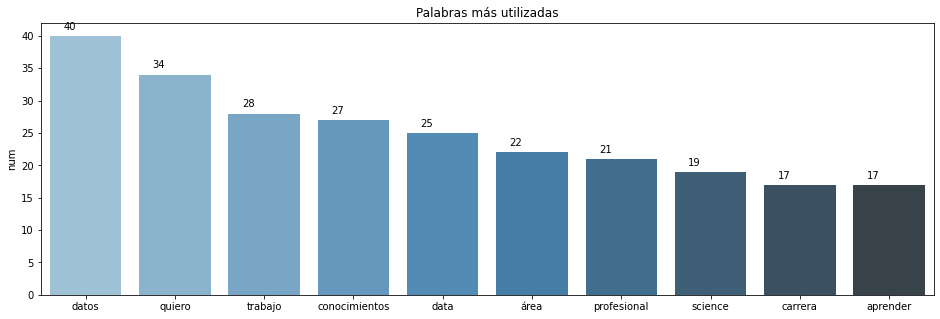

In [39]:
 #ploteamos las palabras más utilizadas en los discursos
import seaborn as sns
plt.figure(figsize = (16,5))
plt.title('Palabras más utilizadas')
sns.barplot(data.index, y="num", data=data, palette="Blues_d")
xlocs, xlabs = plt.xticks()
for i, v in enumerate(data.num):
    plt.text(xlocs[i] - 0.25, v + 1, str(v))

## Nube de palabras


Esta es otra forma de analizar las respuestas, lo que sigue puede ser un poco más denso.

Vamos a realizar una nube de palabra de acuerdo a la respuesta dada en; *¿Pagarías por una formación completa como data scientist?¿Cuánto?*



In [41]:
df['¿Pagarías por una formación completa como data scientist?¿Cuánto?'].value_counts()

Sí, menos de 500 dólares         101
Sí, entre 500 a 1000 dólares      47
No                                39
Sí, entre 1000 a 1500 dólares     17
Sí, más de 2000 dólares            9
Sí, entre 1500 a 2000 dólares      6
Name: ¿Pagarías por una formación completa como data scientist?¿Cuánto?, dtype: int64

In [42]:
df['¿Pagarías por una formación completa como data scientist?¿Cuánto?'].value_counts().index

Index(['Sí, menos de 500 dólares', 'Sí, entre 500 a 1000 dólares', 'No',
       'Sí, entre 1000 a 1500 dólares', 'Sí, más de 2000 dólares',
       'Sí, entre 1500 a 2000 dólares'],
      dtype='object')

In [43]:
lista_paga = ['No', 'Sí, menos de 500 dólares', 'Sí, entre 500 a 1000 dólares', 
              'Sí, entre 1000 a 1500 dólares', 'Sí, entre 1500 a 2000 dólares', 'Sí, más de 2000 dólares']

In [44]:
lista_paga

['No',
 'Sí, menos de 500 dólares',
 'Sí, entre 500 a 1000 dólares',
 'Sí, entre 1000 a 1500 dólares',
 'Sí, entre 1500 a 2000 dólares',
 'Sí, más de 2000 dólares']

In [45]:
# División de df acorde a respuesta

data_no = df[df['¿Pagarías por una formación completa como data scientist?¿Cuánto?'] == 'No']

data_si_menos_500 = df[df['¿Pagarías por una formación completa como data scientist?¿Cuánto?'] == 'Sí, menos de 500 dólares']

data_si_mas_500_menos_1000 = df[df['¿Pagarías por una formación completa como data scientist?¿Cuánto?'] == 'Sí, entre 500 a 1000 dólares']

data_si_mas_1000_menos_1500 = df[df['¿Pagarías por una formación completa como data scientist?¿Cuánto?'] == 'Sí, entre 1000 a 1500 dólares']

data_si_mas_1500_menos_2000 = df[df['¿Pagarías por una formación completa como data scientist?¿Cuánto?'] == 'Sí, entre 1500 a 2000 dólares']

data_si_mas_2000 = df[df['¿Pagarías por una formación completa como data scientist?¿Cuánto?'] == 'Sí, más de 2000 dólares']


In [46]:
data_no.head()

,¿Por qué quieres aprender Data Science?,¿Pagarías por una formación completa como data scientist?¿Cuánto?,texto_limpio
21,Para buscar nuevas oportunidades laborales,No,buscar nuevas oportunidades laborales
23,Mejora continua,No,mejora continua
27,Curiosidad,No,curiosidad
33,Adquirir nuevas herramientas como economista y...,No,adquirir nuevas herramientas economista futuro...
39,perfeccionar mis conocimientos,No,perfeccionar conocimientos


In [47]:
# Hacemos una lista de los df creados

data_total = [data_no, data_si_menos_500, data_si_mas_500_menos_1000,
 data_si_mas_1000_menos_1500, data_si_mas_1500_menos_2000,
 data_si_mas_2000]

Se debe unir todas las respuestas agrupadas como si fueran un solo texto

In [49]:
from tqdm import tqdm # librería para obtener una barrita de progreso en %
diccionario = {}
i = 0
for df in tqdm(data_total):
    texto_respuesta = ""
    for mensaje in df['¿Por qué quieres aprender Data Science?']:
        texto_respuesta = texto_respuesta + str(mensaje) + " "
    diccionario[lista_paga[i]] = texto_respuesta
    i += 1

100%|██████████| 6/6 [00:00<00:00, 2996.29it/s]


In [50]:
diccionario.keys()

dict_keys(['No', 'Sí, menos de 500 dólares', 'Sí, entre 500 a 1000 dólares', 'Sí, entre 1000 a 1500 dólares', 'Sí, entre 1500 a 2000 dólares', 'Sí, más de 2000 dólares'])

In [51]:
df_paga_sub = pd.DataFrame([[key, diccionario[key]] for key in diccionario.keys()], index = lista_paga, columns=['Paga', 'Mensajes'])
df_paga_sub

,Paga,Mensajes
No,No,Para buscar nuevas oportunidades laborales Mej...
"Sí, menos de 500 dólares","Sí, menos de 500 dólares",Por necesidades y oportunidades laborales. Par...
"Sí, entre 500 a 1000 dólares","Sí, entre 500 a 1000 dólares",Acabo de egresar de ingeniería civil informáti...
"Sí, entre 1000 a 1500 dólares","Sí, entre 1000 a 1500 dólares",Trabajo en ti en una clínica y una universidad...
"Sí, entre 1500 a 2000 dólares","Sí, entre 1500 a 2000 dólares",Para posicionarme mejor en mi trabajo Me inter...
"Sí, más de 2000 dólares","Sí, más de 2000 dólares",Buscar nichos laborales Para ayudar en mi futu...


Limpiamos el texto

In [54]:
## Creamos una lista vacía para guardar el texto limpio
clean_text = []
## Recorremos cada valoración del dataset
for i in df_paga_sub['Mensajes']:

 ## Procesamos con la función creada el texto y lo agregamos a nuestra lista

 clean_text.append(limpiar_texto(str(i)))


In [55]:
# Creamos una nueva columna en nuestro dataset con el texto limpio
df_paga_sub['texto_limpio'] = clean_text

In [56]:
# Crear matriz dispersa

cv_a = CountVectorizer()

data_cv_a = cv_a.fit_transform(df_paga_sub.texto_limpio)

data_paga = pd.DataFrame(data_cv_a.toarray(), columns=cv_a.get_feature_names())

data_paga.index = df_paga_sub.index

data_paga

,abre,abrumadora,acabo,academia,academicas,acercarme,actual,actuales,actualización,actualizar,...,yendo,youtube,álgebra,área,áreas,ésta,último,últimos,útil,útiles
No,1,0,0,0,0,0,0,1,0,0,...,0,0,0,2,0,0,0,1,1,1
"Sí, menos de 500 dólares",0,1,0,1,0,0,0,0,1,1,...,0,1,1,16,2,0,0,0,0,2
"Sí, entre 500 a 1000 dólares",0,0,1,0,1,0,0,0,0,3,...,0,0,0,3,1,0,0,0,0,1
"Sí, entre 1000 a 1500 dólares",0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
"Sí, entre 1500 a 2000 dólares",0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
"Sí, más de 2000 dólares",0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [57]:
data_paga_trans = data_paga.transpose()
data_paga_trans.head()

,No,"Sí, menos de 500 dólares","Sí, entre 500 a 1000 dólares","Sí, entre 1000 a 1500 dólares","Sí, entre 1500 a 2000 dólares","Sí, más de 2000 dólares"
abre,1,0,0,0,0,0
abrumadora,0,1,0,0,0,0
acabo,0,0,1,0,0,0
academia,0,1,0,0,0,0
academicas,0,0,1,0,0,0


In [58]:
data_a = data_paga_trans

In [59]:
top_dict_a = {}

for c in data_a.columns:
    top = data_a[c].sort_values(ascending=False).head(30)
    top_dict_a[c]= list(zip(top.index, top.values))
    
# Imprimir las 15 palabras más usadas por respuesta

for respuesta, top_words in top_dict_a.items():
    print(respuesta)
    print(', '.join([word for word, count in top_words[0:14]]))

No
datos, nuevas, quiero, adquirir, mejorar, oportunidades, data, interés, proyectos, información, interesado, conocimientos, conocimiento, complementar
Sí, menos de 500 dólares
datos, trabajo, área, quiero, conocimientos, data, profesional, poder, conocimiento, interesa, información, gusta, science, carrera
Sí, entre 500 a 1000 dólares
datos, quiero, aprender, conocimientos, data, poder, gustaría, profesional, carrera, mejorar, science, interesa, análisis, trabajo
Sí, entre 1000 a 1500 dólares
data, science, conocimientos, mismo, tema, carrera, universidad, quiero, aprender, uso, programación, reforzar, adquiriendo, trabajar
Sí, entre 1500 a 2000 dólares
data, trabajo, carrera, quiero, science, disciplina, fondo, técnicas, learning, gustaría, aumentar, análisis, posicionarme, conocimiento
Sí, más de 2000 dólares
quiero, profesional, futuro, ds, personales, proyectos, mejorar, programación, habilidades, profundizar, ml, edad, aspectos, ello


In [52]:
!pip install wordcloud

Using legacy 'setup.py install' for wordcloud, since package 'wheel' is not installed.
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'done'


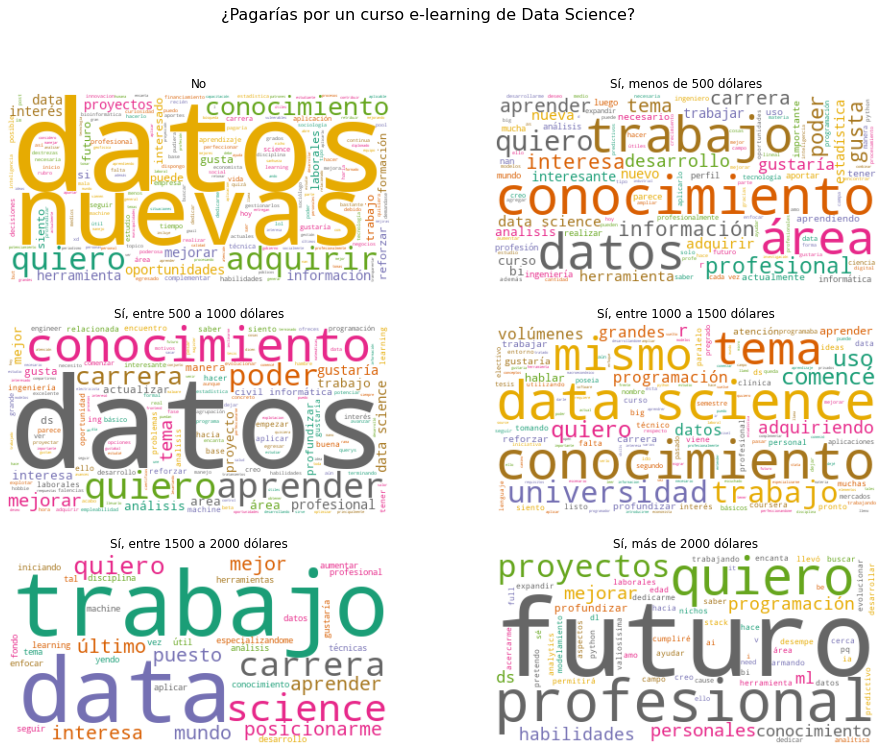

In [60]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stopwords.words('spanish'), background_color="white",
colormap="Dark2",
 max_font_size=150, random_state=42)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]
# Create subplots for each Mes
for index, resp in enumerate(data_a.columns):
    if len(df_paga_sub.texto_limpio[resp]) > 0:
        wc.generate(df_paga_sub.texto_limpio[resp])
        plt.subplot(3, 2, index+1)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(resp)
    else:
        pass
#plt.title('¿Pagarías por un curso e-learning de Data Science?')
plt.suptitle('¿Pagarías por un curso e-learning de Data Science?', fontsize=16
)
plt.show()